# **Qutip qubit-oscillator**

## **Import Library**

In [1]:
from qutip import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import math

In [3]:
# Menentukan nilai Parameter
wc = 2*np.pi         #frekuensi medan
wa = 2*np.pi         #frekuensi atom
N = 300               #jumlah n medan
use_rwa = False
g_list = np.linspace(0, 16, 101)*2*np.pi # Kuat interaksi

#operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi


## **Lowest ten energy levels in the case of a high-frequency qubit**

### **Variasi $\theta = 0$**

In [4]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq = 0.5 * wa* (-np.sin(0)*sx1 + np.cos(0)*sz1)/0.01    # qubit
   
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

# Menghitung Hamiltonian
psi_list = []
E_list = []
for g in g_list:
    # Hamiltonian total
    H = Ho + Hq + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H.eigenstates() 
    psi_list.append(eigen_state)
    E_list.append(eigen_energy/(2*np.pi))
 
# List energi berdasar tingkat eksitasi
E_level = []
for i in range(0,10):
    E = [item[i] for item in E_list]
    E_level.append(E)
    i +=1

### **Variasi $\theta = \pi/6$**

In [5]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq2 = 0.5 * wa* (np.sin(np.pi/6)*sx1 + np.cos(np.pi/6)*sz1)/0.01     # qubit


# Menghitung Hamiltonian
psi_list2 = []
E_list2 = []
for g in g_list:
    # Hamiltonian total
    H2 = Ho + Hq2 + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H2.eigenstates() 
    psi_list.append(eigen_state)
    E_list2.append(eigen_energy/(2*np.pi))

# List energi berdasar tingkat eksitasi
E_level2 = []
for i in range(0,10):
    E = [item[i] for item in E_list2]
    E_level2.append(E)
    i +=1

### **Variasi $\theta = \pi/3$**

In [6]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq3 = 0.5 * wa* (np.sin(np.pi/3)*sx1 + np.cos(np.pi/3)*sz1)/0.01     # qubit


# Menghitung Hamiltonian
psi_list3 = []
E_list3 = []
for g in g_list:
    # Hamiltonian total
    H3 = Ho + Hq3 + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H3.eigenstates() 
    psi_list.append(eigen_state)
    E_list3.append(eigen_energy/(2*np.pi))

# List energi berdasar tingkat eksitasi
E_level3 = []
for i in range(0,10):
    E = [item[i] for item in E_list3]
    E_level3.append(E)
    i +=1

## **Plotting**

### **Variasi $\theta = 0$**

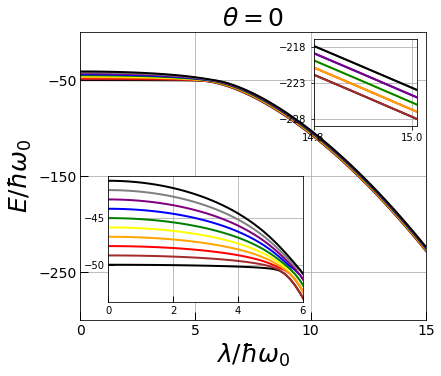

In [10]:
# Memplot nilai energi
# Plot variasi theta = 0
# Main setting

fig = plt.figure(figsize=(6, 5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes1 = fig.add_axes([0.64, 0.64, 0.24, 0.24])
axes2 = fig.add_axes([0.165, 0.15, 0.45, 0.35])

#main plot 
b = ['black', 'brown', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'grey',  'black']
for a in range (0,10):
    axes.plot(g_list/(2*np.pi), E_level[a], b[a], linewidth=2)
    a += 1

axes.set_xticks(np.arange(0, 16, 5))
axes.set_yticks(np.arange(-250, 0, 100))

axes.set(xlim=(0, 15), ylim=(-300, 0))
axes.set_title(r"$\theta = 0$", fontsize=25)
axes.set_ylabel(r"$E / \hbar\omega_{0}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)
axes.grid()

#insert1 plot
for a in range (0,10):
    axes1.plot(g_list/(2*np.pi), E_level[a], b[a], linewidth=2)
    a += 1

axes1.set_xticks(np.arange(-14.8, 16, 0.2))
axes1.set_yticks(np.arange(-228, -217, 5))
axes1.set(xlim=(14.8, 15.01), ylim=(-229, -217))
axes1.grid()

#insert2 plot
for a in range (0,10):
    axes2.plot(g_list/(2*np.pi), E_level[a], b[a], linewidth=2)
    a += 1

axes2.set_xticks(np.arange(0, 6.5, 2))
axes2.set_yticks(np.arange(-55, -40, 5))
axes2.set(xlim=(0, 6), ylim=(-54, -40.5))

axes2.tick_params(axis="x", direction="in", length=6, width=1)
axes2.tick_params(axis="y", direction="in", length=6, width=1)
axes2.grid()



### **Variasi $\theta = \pi/6$**

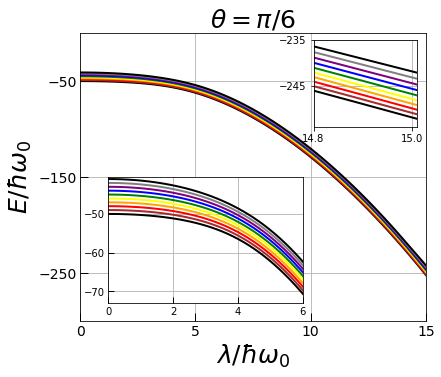

In [8]:
# Plot variasi theta = pi/6
fig = plt.figure(figsize=(6, 5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes1 = fig.add_axes([0.64, 0.64, 0.24, 0.24])
axes2 = fig.add_axes([0.165, 0.15, 0.45, 0.35])
 
b = ['black', 'brown', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'grey',  'black']
for a in range (0,10):
    axes.plot(g_list/(2*np.pi), E_level2[a], b[a], linewidth=2)
    a += 1
# main plot
axes.set_xticks(np.arange(0, 15.5, 5))
axes.set_yticks(np.arange(-250, 0, 100))

axes.set(xlim=(0, 15), ylim=(-300, 0))
axes.set_title(r"$\theta = \pi/6$", fontsize=25)
axes.set_ylabel(r"$E / \hbar\omega_{0}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)
axes.grid()

# insert1 plot
for a in range (0,10):
    axes1.plot(g_list/(2*np.pi), E_level2[a], b[a], linewidth=2)
    a += 1

axes1.set_xticks(np.arange(-14.8, 16, 0.2))
axes1.set_yticks(np.arange(-265, -230, 10))

axes1.set(xlim=(14.8, 15.01), ylim=(-254, -235))
axes1.grid()

#insert2 plot
for a in range (0,10):
    axes2.plot(g_list/(2*np.pi), E_level2[a], b[a], linewidth=2)
    a += 1

axes2.set_xticks(np.arange(0, 6.5, 2))
axes2.set_yticks(np.arange(-80, -39.5, 10))

axes2.set(xlim=(0, 6), ylim=(-73, -40.5))
axes2.tick_params(axis="x", direction="in", length=6, width=1)
axes2.tick_params(axis="y", direction="in", length=6, width=1)
axes2.grid()

### **Variasi $\theta = \pi/3$**

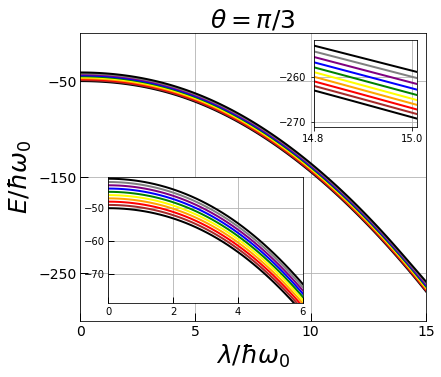

In [9]:
# plot variasi theta = pi/3
fig = plt.figure(figsize=(6,5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes1 = fig.add_axes([0.64, 0.64, 0.24, 0.24])
axes2 = fig.add_axes([0.165, 0.15, 0.45, 0.35])
 
b = ['black', 'brown', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'grey',  'black']
for a in range (0,10):
    axes.plot(g_list/(2*np.pi), E_level3[a], b[a], linewidth=2)
    a += 1

axes.set_xticks(np.arange(0, 15.5, 5))
axes.set_yticks(np.arange(-250, 0, 100))

# main plot
axes.set(xlim=(0, 15), ylim=(-300, 0))
axes.set_title(r"$\theta = \pi/3$", fontsize=25)
axes.set_ylabel(r"$E / \hbar\omega_{0}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)
axes.grid()

# insert1 plot
for a in range (0,10):
    axes1.plot(g_list/(2*np.pi), E_level3[a], b[a], linewidth=2)
    a += 1

axes1.set_xticks(np.arange(-14.8, 16, 0.2))
axes1.set_yticks(np.arange(-270, -249, 10))
axes1.set(xlim=(14.8, 15.01), ylim=(-271, -252))
axes1.grid()

#insert2 plot
for a in range (0,10):
    axes2.plot(g_list/(2*np.pi), E_level3[a], b[a], linewidth=2)
    a += 1

axes2.set_xticks(np.arange(0, 6.5, 2))
axes2.set_yticks(np.arange(-80, -39.5, 10))

axes2.set(xlim=(0, 6), ylim=(-79, -40.5))
axes2.tick_params(axis="x", direction="in", length=6, width=1)
axes2.tick_params(axis="y", direction="in", length=6, width=1)
axes2.grid()
